# 🎲 Stochastic Differential Equations in Finance: Wiener Process, General Wiener Process, and Geometric Brownian Motion

## Introduction

In this notebook, we delve into the world of **stochastic differential equations (SDEs)**, which form the backbone of modern financial modeling. We'll explore three key processes:

- The **Standard Wiener Process** (Brownian Motion) as a building block.
- The **General Wiener Process**, incorporating drift and volatility.
- The **Geometric Brownian Motion (GBM)**, used extensively in modeling stock prices.

These processes are central to understanding asset price dynamics, risk management, and options pricing models like Black-Scholes.

## 🌊 Standard Wiener Process

The **Standard Wiener Process** is the most basic form of stochastic process, representing pure randomness over time. The SDE for this process is:

$$
dW(t) = \epsilon \sqrt{dt}
$$

Where:
- $dW(t)$ is the change in the Wiener process at time $t$.
- $\epsilon$ is a standard normal variable, $N(0,1)$.
- $dt$ is the small time increment.

This process has the following key characteristics:
- Zero mean: $E[dW(t)] = 0$
- Variance proportional to time: $Var[dW(t)] = dt$

We'll simulate this process to visualize random paths over time.

## 📈 General Wiener Process

The **General Wiener Process** introduces drift ($\mu$) and volatility ($\sigma$) to the standard Wiener process, making it more suitable for financial modeling. The SDE is given by:

$$
dX(t) = \mu \, dt + \sigma \, dW(t)
$$

Where:
- $\mu$ represents the drift, or the deterministic trend.
- $\sigma$ is the volatility, adding randomness to the process.
- $dW(t)$ is the increment of a Wiener process.

In financial terms, this SDE can model assets that tend to grow or shrink over time, with randomness. We'll simulate how different values of $\mu$ and $\sigma$ affect the path of the process.

## 📊 Geometric Brownian Motion (GBM)

The **Geometric Brownian Motion (GBM)** is widely used to model stock prices and other financial instruments. Its SDE takes the form:

$$
dS(t) = \mu S(t) \, dt + \sigma S(t) \, dW(t)
$$

Where:
- $S(t)$ is the asset price at time $t$.
- $\mu$ is the drift rate, which can be interpreted as the expected return of the asset.
- $\sigma$ is the volatility, measuring the uncertainty or risk.
- $dW(t)$ is a Wiener process increment.

GBM models the exponential growth or decay of asset prices with both a deterministic component ($\mu S(t)$) and a random component ($\sigma S(t) dW(t)$).

The solution to this SDE is:

$$
S(t) = S(0) \exp\left( \left( \mu - \frac{\sigma^2}{2} \right) t + \sigma W(t) \right)
$$

We'll simulate GBM and examine how asset prices evolve under different conditions, focusing on the impact of $\mu$ and $\sigma$.

## 🔄 Applications in Finance

1. **Stock Price Modeling**: GBM is the cornerstone of the Black-Scholes-Merton model used for option pricing.
2. **Risk Management**: The Wiener process helps quantify the randomness in asset returns, key for calculating risk measures like Value at Risk (VaR).
3. **Derivative Pricing**: The combination of SDEs, particularly GBM, forms the foundation of various derivative pricing models.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

<Axes: >

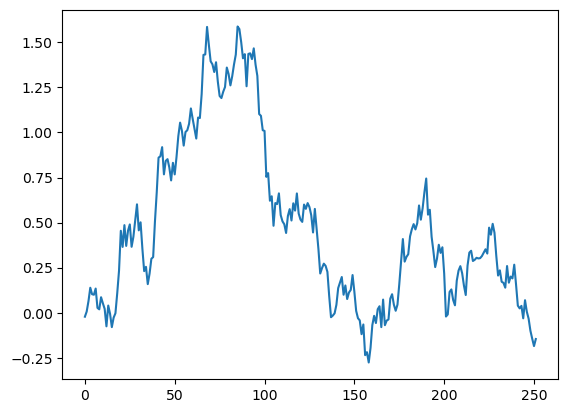

In [3]:
"""
Standard Wiener process simulation. 
"""
def standard_wiener_process(maturity, nb_observations):
    dt = maturity / nb_observations
    dW = np.sqrt(dt) * np.random.randn(nb_observations)
    W = np.cumsum(dW)
    return W
W_simulated = standard_wiener_process(2, 252)
W_simulated = pd.Series(W_simulated)
W_simulated.plot()

<Axes: >

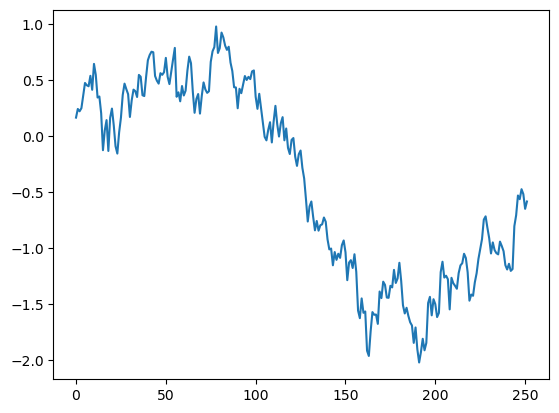

In [4]:
"""
General Wiener process simulation. (alpha, beta) are the drift and volatility parameters.
A standard Wiener process is obtained by setting alpha = 0 and beta = 1.
"""
def general_wiener_process(maturity, nb_observations, alpha, beta):
    dt = maturity / nb_observations
    dx = alpha * dt + beta * np.sqrt(dt) * np.random.randn(nb_observations)
    W = np.cumsum(dx)
    return W
W_simulated = general_wiener_process(2, 252, 0.3, 1.5)
W_simulated = pd.Series(W_simulated)
W_simulated.plot()

<Axes: >

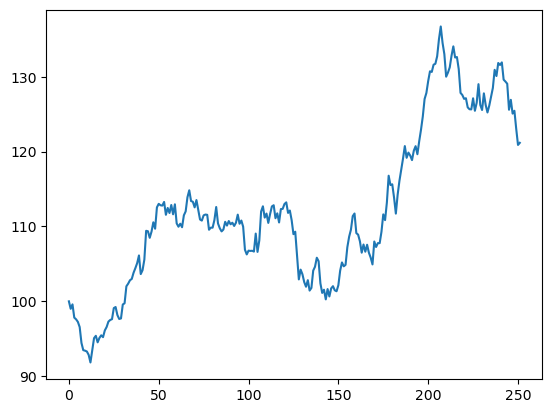

In [5]:
"""
Geometric Brownian Motion (GBM) simulation. 
"""
def GBM_simulation(S0, maturity, nb_observations, mu, sigma):
    dt = maturity / nb_observations
    S = np.zeros(nb_observations)
    S[0] = S0
    for i in range(1, nb_observations):
        deltaS = mu * S[i - 1] * dt + sigma * S[i - 1] * np.sqrt(dt) * np.random.randn()
        S[i] = S[i - 1] + deltaS
    return S
gbm_simulated = GBM_simulation(100, 1, 252, 0.1, 0.2)
gbm_simulated = pd.Series(gbm_simulated)
gbm_simulated.plot()

<Axes: >

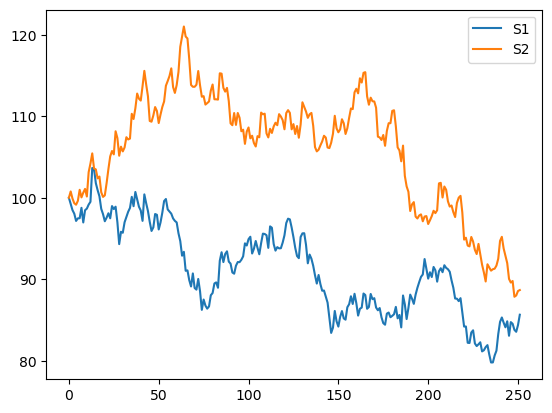

In [6]:
"""
Correlated Geometric brownian Motion process simulation.
"""
def correlated_GBM_simulation(S0_1, S0_2, maturity, nb_observations, mu_1, sigma_1, mu_2, sigma_2, rho):
    dt = maturity / nb_observations
    
    S1 = np.zeros(nb_observations)
    S1[0] = S0_1
    S2 = np.zeros(nb_observations)
    S2[0] = S0_2
    
    W1 = np.sqrt(dt) * np.random.randn(nb_observations)
    W2 = rho * W1 + np.sqrt(1 - rho ** 2) * np.sqrt(dt) * np.random.randn(nb_observations)
    for i in range(1, nb_observations):
        deltaS1 = mu_1 * S1[i - 1] * dt + sigma_1 * S1[i - 1] * W1[i]
        S1[i] = S1[i - 1] + deltaS1
        
        deltaS2 = mu_2 * S2[i - 1] * dt + sigma_2 * S2[i - 1] * W2[i]
        S2[i] = S2[i - 1] + deltaS2
    return S1, S2

correlated_GBM_simulated = correlated_GBM_simulation(
    S0_1=100, 
    S0_2=100, 
    maturity=1, 
    nb_observations=252, 
    mu_1=0.1, 
    sigma_1=0.2,
    mu_2=0.1,
    sigma_2=0.2, 
    rho=0.5
    )
correlated_GBM_simulated = pd.DataFrame(correlated_GBM_simulated).T
correlated_GBM_simulated.columns = ['S1', 'S2']
correlated_GBM_simulated.plot()

**We'll not simulate a Fractional Geometric Brownian Motion in this notebook because it is out of the context of this chapter. However, you can find it in the .py file**

***Problems & Exercises***

In [11]:
"""
14.12
Minimum cash to possess to avoid it to be negative if it follows a Wiener process.
"""
drift = 0.5 # trimestrial
variance = 4 # trimestrial
low_threshold = 0.05 # P(X < low_threshold) = 0.05
maturity = 4 # 4 trimestrial = 1 year
unit = 1e6 # 1 million $

# As the Wiener process is a normal distribution, solve for X in the equation N(-[X + 2] / 4) = 0.05
# Use the percent point function (inverse of the CDF) to find the Z-score corresponding to the probability
z_value = stats.norm.ppf(low_threshold)
mu = drift * maturity
std = np.sqrt(variance) * np.sqrt(maturity)

# Solve for X
X = z_value * - std - mu
minimum_cash = X * unit
print(f"Minimum cash to possess to avoid it to be negative: {minimum_cash:.2f}$")
    

Minimum cash to possess to avoid it to be negative: 4579414.51$


<Axes: >

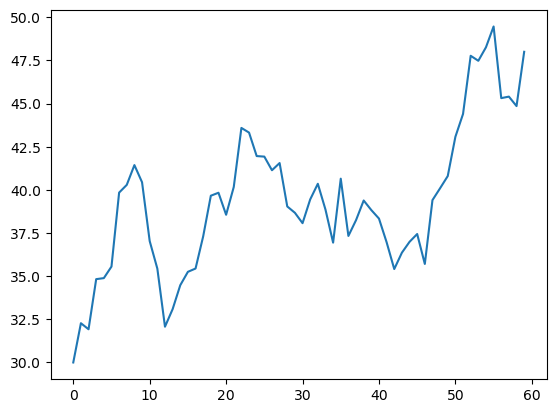

In [17]:
"""
14.21
Simulating a geometric brownian motion with a drift and a volatility.
"""
S0 = 30
drift = 0.09
vol = 0.2
maturity = 5
nb_observations = maturity * 12
simulation = GBM_simulation(S0=S0, maturity=maturity, nb_observations=nb_observations, mu=drift, sigma=vol)
simulation = pd.Series(simulation)
simulation.plot()

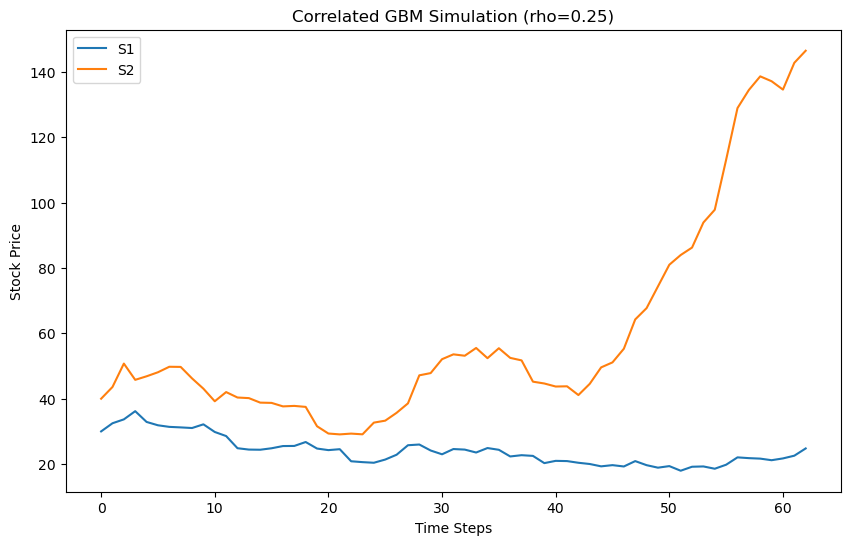

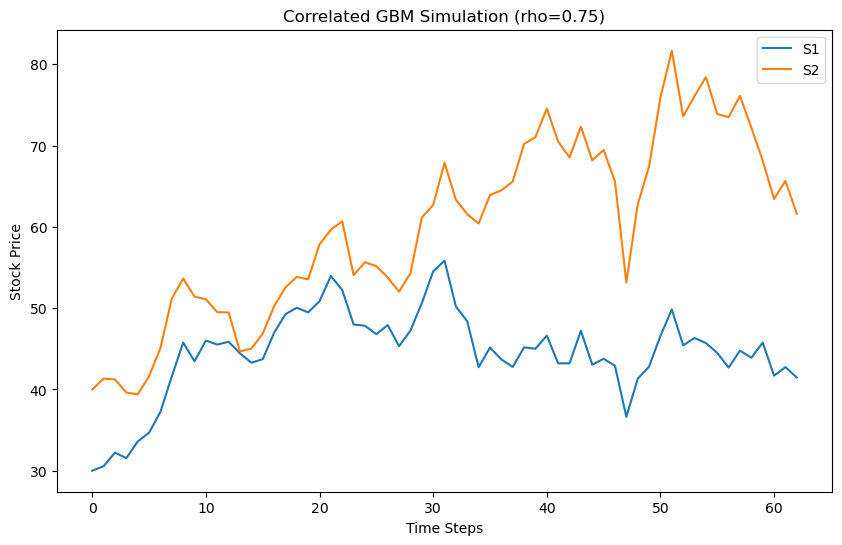

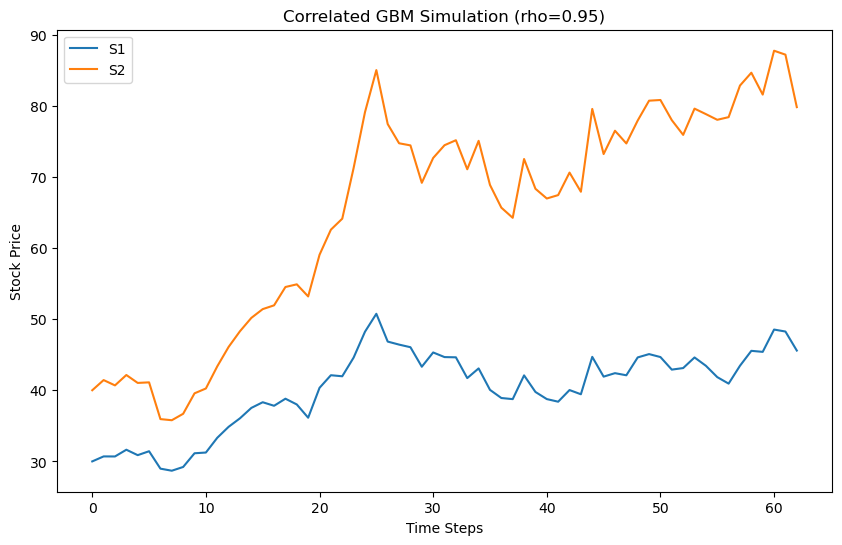

In [8]:
"""
14.24
Simulation of two stocks.
"""
spot_A = 30
mu_A = 0.11
vol_A = 0.25

spot_B = 40
mu_B = 0.15
vol_B = 0.30

maturity = 3
step = int(252 / 12) * maturity
correl1 = 0.25
correl2 = 0.75
correl3 = 0.95

for rho in [correl1, correl2, correl3]:
    S1, S2 = correlated_GBM_simulation(
        S0_1=spot_A, 
        S0_2=spot_B, 
        maturity=maturity, 
        nb_observations=step, 
        mu_1=mu_A, 
        sigma_1=vol_A, 
        mu_2=mu_B, 
        sigma_2=vol_B, 
        rho=rho
        )
    # Create a DataFrame to store the simulated paths
    correlated_GBM_simulated = pd.DataFrame({
        'S1': S1,
        'S2': S2
    })
    
    # Plot the results
    plt.figure(figsize=(10,6))
    correlated_GBM_simulated.plot(ax=plt.gca())
    plt.title(f'Correlated GBM Simulation (rho={rho})')
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')
    plt.show()
    